# Valuation Visualization Analysis

---


## Using Financial Modeling Prep API

https://financialmodelingprep.com/developer/docs/

In [16]:
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from pathlib import Path
import os
import time
import json
import datetime
import plotly.express as px

#### User sets their unique .env path and ticker_path

In [27]:
# # David Load .env, api_key, and ticker_path

# #David
# env_path = Path(r'C:\Users\david\Dropbox\Learning\Northwestern\Project1\.env')

# load_dotenv(env_path)
# api_key = os.getenv('FINANCIAL_MODELING_API_KEY')

# # Set file variable for csv of tickers symbols
# ticker_path = Path('Resources/dow_tickers.csv')

# # Confirm if load_dotenv worked. Remove this later!
# load_dotenv()

In [ ]:
# Marshall Load .env, api_key, and ticker_path

#Marshall
env_path = Path('/Users/marshallwolfe/Desktop') / '.env'

load_dotenv(env_path)
api_key = os.getenv('FINANCIAL_MODELING_API_KEY')

# Set file variable for csv of tickers symbols
ticker_path = Path('Resources/dow_tickers.csv')

# Confirm if load_dotenv worked. Remove this later!
load_dotenv()

In [ ]:
# # Amrita Load .env, api_key, and ticker_path

# #Amrita
# env_path = Path(r'C:\Python\.env')

# load_dotenv(env_path)
# api_key = os.getenv('FINANCIAL_MODELING_API_KEY')

# # Set file variable for csv of tickers symbols
# ticker_path = Path(r'C:\Users\amrita.kumari\ValuationVisualization\ValuationVisualization\dow_tickers.csv')

# # Confirm if load_dotenv worked. Remove this later!
# load_dotenv()

#### User sets Pandas DataFrame formatting options

In [23]:
# Pandas DataFrame formatting to see decimals
pd.options.display.float_format = "{:.2f}".format

#### User pulls data from API

In [39]:
# Tickers DOW, DIS, WBA have incomplete data for the last 10 years

tickers_df = pd.read_csv(ticker_path, header=None)
tickers = list(tickers_df[0].values)
dow_is_df = pd.DataFrame()
date_list = []
ticker_list = []
price_list = []
revenue_list = []
eps_list = []
pe_list = []
shares_outstanding_list = []
mkt_cap_list= []

for ticker_name in tickers:

    for year in range(11,-1,-1):

        url = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker_name}?apikey={api_key}"
        requests.get(url).content
        parsed = json.loads(requests.get(url).content)
        
        url2 = f"https://financialmodelingprep.com/api/v3/enterprise-values/{ticker_name}?apikey={api_key}"
        requests.get(url2).content
        parsed2 = json.loads(requests.get(url2).content)
        
        url3 = f"https://financialmodelingprep.com/api/v3/ratios/{ticker_name}?apikey={api_key}"
        requests.get(url3).content
        parsed3 = json.loads(requests.get(url3).content)

        try:
            date_list.append(parsed[year]['date'])
        except:
            date_list.append(np.nan)
            
        ticker_list.append(ticker_name)
        
        try:
            price_list.append(parsed2[year]['stockPrice'])
        except:
            price_list.append(np.nan)
        
        try:
            revenue_list.append(parsed[year]['revenue'])
        except:
            revenue_list.append(np.nan)
    
        try:
            eps_list.append(parsed[year]['eps'])
        except:
            eps_list.append(np.nan)
            
        try:
            pe_list.append(parsed3[year]['priceEarningsRatio'])
        except:
            pe_list.append(np.nan)

        try:
            shares_outstanding_list.append(parsed[year]['weightedAverageShsOut'])
        except:
            shares_outstanding_list.append(np.nan)
            
        try:
            mkt_cap_list.append(parsed2[year]['marketCapitalization'])
        except:
            mkt_cap_list.append(np.nan)
    
dict1 = {'Date': date_list, 'Ticker': ticker_list, 'Stock Price': price_list, 'Revenue': revenue_list, 'EPS': eps_list, 'PE': pe_list, 'Shares Outstanding': shares_outstanding_list,'Market Cap':mkt_cap_list}

dow_is_df = pd.DataFrame(dict1)

In [77]:
# Export csv of API data
dow_is_df.to_csv('Resources/output2008raw.csv')

#### Load CSV of API data to speed analysis

In [91]:
# Read file path of csv of API data
csv_of_API_path = Path('Resources/output2008raw.csv')

In [92]:
# Read csv of API data into DataFrame
csv_of_API = pd.read_csv(csv_of_API_path)
csv_of_API.drop(columns=["Unnamed: 0"], inplace=True)
csv_of_API.head()

,Date,Ticker,Stock Price,Revenue,EPS,PE,Shares Outstanding,Market Cap
0,2008-12-31,MMM,53.79,25269000000.00,4.95,10.87,699000000.00,37599210000.00
1,2009-12-31,MMM,80.49,23123000000.00,2.04,17.37,700500000.00,56343000000.00
2,2010-12-31,MMM,87.44,26662000000.00,5.72,15.28,713700000.00,62405928000.00
3,2011-12-31,MMM,87.34,29611000000.00,6.05,14.45,708500000.00,61880390000.00
4,2012-12-31,MMM,100.80,29904000000.00,6.40,15.74,693900000.00,69945120000.00


In [93]:
# Show all rows
pd.set_option('display.max_rows',600)
df_copy = csv_of_API
df_copy

,Date,Ticker,Stock Price,Revenue,EPS,PE,Shares Outstanding,Market Cap
0,2008-12-31,MMM,53.79,25269000000.00,4.95,10.87,699000000.00,37599210000.00
1,2009-12-31,MMM,80.49,23123000000.00,2.04,17.37,700500000.00,56343000000.00
2,2010-12-31,MMM,87.44,26662000000.00,5.72,15.28,713700000.00,62405928000.00
3,2011-12-31,MMM,87.34,29611000000.00,6.05,14.45,708500000.00,61880390000.00
4,2012-12-31,MMM,100.80,29904000000.00,6.40,15.74,693900000.00,69945120000.00
5,2013-12-31,MMM,128.05,30871000000.00,6.83,18.74,681900000.00,87317295000.00
6,2014-12-31,MMM,162.30,31821000000.00,7.63,21.26,649200000.00,105365160000.00
7,2015-12-31,MMM,151.00,30274000000.00,7.72,19.55,625600000.00,94465600000.00
8,2016-12-31,MMM,175.42,30109000000.00,8.35,21.01,604700000.00,106076474000.00
9,2017-12-31,MMM,251.54,31657000000.00,8.13,30.94,597500000.00,150295150000.00


#### First Derivative Function:

In [94]:
def first_der(dataframe,column_name):

    out_df = dataframe.copy(deep=True)
    
    new_column_name = f'{column_name} 1st Der'

    out_df[new_column_name] = out_df[column_name].pct_change()

    tlist = []
    dran = len(out_df)

    for i in range(dran):
    
        if out_df['Ticker'][i] not in tlist:
            tlist.append(out_df['Ticker'][i])
            out_df[new_column_name][i] = np.nan
    
    return out_df

#### Second Derivative Function:

In [95]:
def second_der(dataframe,column_name):
    
    # first_der(df_copy,column_name2)
    
    out_df = dataframe.copy(deep=True)
    
    new_column_name = column_name + ' 2nd Der'
    old_column_name = column_name + ' 1st Der'

    out_df[new_column_name] = out_df[column_name].pct_change()
    
    # df_c2 = out_df
    out_df[new_column_name] = out_df[old_column_name].pct_change()
    # out_df
    
    tlist2 = []
    dran2 = len(out_df)

    for i in range(dran2):
        if out_df['Ticker'][i] not in tlist2:
            tlist2.append(out_df['Ticker'][i])
            out_df[new_column_name][i] = np.nan
            out_df[new_column_name][i+1] = np.nan
    # df_c2
    
    dran3 = len(out_df)-1

    for i in range(dran3):
        x1 = out_df[old_column_name][i]
        # print(f'x1 = {x1}')
        x2 = out_df[old_column_name][i+1]
        # print(f'x2 = {x2}')   

        if pd.isnull(x1) or pd.isnull(x2):
            continue
        else:
            if (x1*x2)<0:
                # print(x1*x2)
                out_df[new_column_name][i+1] = np.nan
    return out_df

#### Select metrics and run first and second derivative functions on each metric:

In [96]:
# Define metric list and run first and second derivative functions on each metric
metric_list = ['Stock Price','Revenue','EPS','PE']

for metric in metric_list:
    df_copy=first_der(df_copy,metric)
    df_copy=second_der(df_copy,metric)
    
df_copy

/Users/marshallwolfe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/marshallwolfe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/marshallwolfe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/marshallwolfe/opt/anaconda3

,Date,Ticker,Stock Price,Revenue,EPS,PE,Shares Outstanding,Market Cap,Stock Price 1st Der,Stock Price 2nd Der,Revenue 1st Der,Revenue 2nd Der,EPS 1st Der,EPS 2nd Der,PE 1st Der,PE 2nd Der
0,2008-12-31,MMM,53.79,25269000000.00,4.95,10.87,699000000.00,37599210000.00,nan,nan,nan,nan,nan,nan,nan,nan
1,2009-12-31,MMM,80.49,23123000000.00,2.04,17.37,700500000.00,56343000000.00,0.50,nan,-0.08,nan,-0.59,nan,0.60,nan
2,2010-12-31,MMM,87.44,26662000000.00,5.72,15.28,713700000.00,62405928000.00,0.09,-0.83,0.15,nan,1.80,nan,-0.12,nan
3,2011-12-31,MMM,87.34,29611000000.00,6.05,14.45,708500000.00,61880390000.00,-0.00,nan,0.11,-0.28,0.06,-0.97,-0.05,-0.55
4,2012-12-31,MMM,100.80,29904000000.00,6.40,15.74,693900000.00,69945120000.00,0.15,nan,0.01,-0.91,0.06,0.00,0.09,nan
5,2013-12-31,MMM,128.05,30871000000.00,6.83,18.74,681900000.00,87317295000.00,0.27,0.75,0.03,2.27,0.07,0.16,0.19,1.13
6,2014-12-31,MMM,162.30,31821000000.00,7.63,21.26,649200000.00,105365160000.00,0.27,-0.01,0.03,-0.05,0.12,0.74,0.13,-0.30
7,2015-12-31,MMM,151.00,30274000000.00,7.72,19.55,625600000.00,94465600000.00,-0.07,nan,-0.05,nan,0.01,-0.90,-0.08,nan
8,2016-12-31,MMM,175.42,30109000000.00,8.35,21.01,604700000.00,106076474000.00,0.16,nan,-0.01,-0.89,0.08,5.92,0.07,nan
9,2017-12-31,MMM,251.54,31657000000.00,8.13,30.94,597500000.00,150295150000.00,0.43,1.68,0.05,nan,-0.03,nan,0.47,5.33


In [97]:
# Check data types
df_copy.dtypes

Date                    object
Ticker                  object
Stock Price            float64
Revenue                float64
EPS                    float64
PE                     float64
Shares Outstanding     float64
Market Cap             float64
Stock Price 1st Der    float64
Stock Price 2nd Der    float64
Revenue 1st Der        float64
Revenue 2nd Der        float64
EPS 1st Der            float64
EPS 2nd Der            float64
PE 1st Der             float64
PE 2nd Der             float64
dtype: object

In [98]:
# Convert Date to datetime
df_copy['Date'] = pd.to_datetime(df_copy['Date'],infer_datetime_format=True)
df_copy.dtypes

Date                   datetime64[ns]
Ticker                         object
Stock Price                   float64
Revenue                       float64
EPS                           float64
PE                            float64
Shares Outstanding            float64
Market Cap                    float64
Stock Price 1st Der           float64
Stock Price 2nd Der           float64
Revenue 1st Der               float64
Revenue 2nd Der               float64
EPS 1st Der                   float64
EPS 2nd Der                   float64
PE 1st Der                    float64
PE 2nd Der                    float64
dtype: object

In [99]:
# Check for nulls
df_copy.isnull().sum()

Date                     0
Ticker                   0
Stock Price              0
Revenue                  0
EPS                      0
PE                      19
Shares Outstanding       0
Market Cap               0
Stock Price 1st Der     27
Stock Price 2nd Der    148
Revenue 1st Der         30
Revenue 2nd Der        142
EPS 1st Der             40
EPS 2nd Der            174
PE 1st Der              27
PE 2nd Der             199
dtype: int64

In [100]:
# Convert Year, Revenue, and Shares Outstanding to Integers
df_copy['Year']=df_copy['Date'].apply(lambda x:x.year)
df_copy['Month']=df_copy['Date'].apply(lambda x:x.month)
df_copy

,Date,Ticker,Stock Price,Revenue,EPS,PE,Shares Outstanding,Market Cap,Stock Price 1st Der,Stock Price 2nd Der,Revenue 1st Der,Revenue 2nd Der,EPS 1st Der,EPS 2nd Der,PE 1st Der,PE 2nd Der,Year,Month
0,2008-12-31,MMM,53.79,25269000000.00,4.95,10.87,699000000.00,37599210000.00,nan,nan,nan,nan,nan,nan,nan,nan,2008,12
1,2009-12-31,MMM,80.49,23123000000.00,2.04,17.37,700500000.00,56343000000.00,0.50,nan,-0.08,nan,-0.59,nan,0.60,nan,2009,12
2,2010-12-31,MMM,87.44,26662000000.00,5.72,15.28,713700000.00,62405928000.00,0.09,-0.83,0.15,nan,1.80,nan,-0.12,nan,2010,12
3,2011-12-31,MMM,87.34,29611000000.00,6.05,14.45,708500000.00,61880390000.00,-0.00,nan,0.11,-0.28,0.06,-0.97,-0.05,-0.55,2011,12
4,2012-12-31,MMM,100.80,29904000000.00,6.40,15.74,693900000.00,69945120000.00,0.15,nan,0.01,-0.91,0.06,0.00,0.09,nan,2012,12
5,2013-12-31,MMM,128.05,30871000000.00,6.83,18.74,681900000.00,87317295000.00,0.27,0.75,0.03,2.27,0.07,0.16,0.19,1.13,2013,12
6,2014-12-31,MMM,162.30,31821000000.00,7.63,21.26,649200000.00,105365160000.00,0.27,-0.01,0.03,-0.05,0.12,0.74,0.13,-0.30,2014,12
7,2015-12-31,MMM,151.00,30274000000.00,7.72,19.55,625600000.00,94465600000.00,-0.07,nan,-0.05,nan,0.01,-0.90,-0.08,nan,2015,12
8,2016-12-31,MMM,175.42,30109000000.00,8.35,21.01,604700000.00,106076474000.00,0.16,nan,-0.01,-0.89,0.08,5.92,0.07,nan,2016,12
9,2017-12-31,MMM,251.54,31657000000.00,8.13,30.94,597500000.00,150295150000.00,0.43,1.68,0.05,nan,-0.03,nan,0.47,5.33,2017,12


In [101]:
# Add a FY column
df_copy['FY'] = df_copy['Year']
mask = (df_copy['Month'] < 3)
df_copy['FY'][mask] = df_copy['Year'][mask]-1
df_copy

/Users/marshallwolfe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Ticker,Stock Price,Revenue,EPS,PE,Shares Outstanding,Market Cap,Stock Price 1st Der,Stock Price 2nd Der,Revenue 1st Der,Revenue 2nd Der,EPS 1st Der,EPS 2nd Der,PE 1st Der,PE 2nd Der,Year,Month,FY
0,2008-12-31,MMM,53.79,25269000000.00,4.95,10.87,699000000.00,37599210000.00,nan,nan,nan,nan,nan,nan,nan,nan,2008,12,2008
1,2009-12-31,MMM,80.49,23123000000.00,2.04,17.37,700500000.00,56343000000.00,0.50,nan,-0.08,nan,-0.59,nan,0.60,nan,2009,12,2009
2,2010-12-31,MMM,87.44,26662000000.00,5.72,15.28,713700000.00,62405928000.00,0.09,-0.83,0.15,nan,1.80,nan,-0.12,nan,2010,12,2010
3,2011-12-31,MMM,87.34,29611000000.00,6.05,14.45,708500000.00,61880390000.00,-0.00,nan,0.11,-0.28,0.06,-0.97,-0.05,-0.55,2011,12,2011
4,2012-12-31,MMM,100.80,29904000000.00,6.40,15.74,693900000.00,69945120000.00,0.15,nan,0.01,-0.91,0.06,0.00,0.09,nan,2012,12,2012
5,2013-12-31,MMM,128.05,30871000000.00,6.83,18.74,681900000.00,87317295000.00,0.27,0.75,0.03,2.27,0.07,0.16,0.19,1.13,2013,12,2013
6,2014-12-31,MMM,162.30,31821000000.00,7.63,21.26,649200000.00,105365160000.00,0.27,-0.01,0.03,-0.05,0.12,0.74,0.13,-0.30,2014,12,2014
7,2015-12-31,MMM,151.00,30274000000.00,7.72,19.55,625600000.00,94465600000.00,-0.07,nan,-0.05,nan,0.01,-0.90,-0.08,nan,2015,12,2015
8,2016-12-31,MMM,175.42,30109000000.00,8.35,21.01,604700000.00,106076474000.00,0.16,nan,-0.01,-0.89,0.08,5.92,0.07,nan,2016,12,2016
9,2017-12-31,MMM,251.54,31657000000.00,8.13,30.94,597500000.00,150295150000.00,0.43,1.68,0.05,nan,-0.03,nan,0.47,5.33,2017,12,2017


In [106]:
# Reorder columns (move Year to the far left)
df_copy=df_copy[['Year','Month','Date','FY','Ticker','Stock Price','Stock Price 1st Der','Stock Price 2nd Der','Revenue','Revenue 1st Der','Revenue 2nd Der','EPS','EPS 1st Der','EPS 2nd Der','PE','PE 1st Der','PE 2nd Der','Shares Outstanding','Market Cap']]
df_copy

,Year,Month,Date,FY,Ticker,Stock Price,Stock Price 1st Der,Stock Price 2nd Der,Revenue,Revenue 1st Der,Revenue 2nd Der,EPS,EPS 1st Der,EPS 2nd Der,PE,PE 1st Der,PE 2nd Der,Shares Outstanding,Market Cap
0,2008,12,2008-12-31,2008,MMM,53.79,nan,nan,25269000000.00,nan,nan,4.95,nan,nan,10.87,nan,nan,699000000.00,37599210000.00
1,2009,12,2009-12-31,2009,MMM,80.49,0.50,nan,23123000000.00,-0.08,nan,2.04,-0.59,nan,17.37,0.60,nan,700500000.00,56343000000.00
2,2010,12,2010-12-31,2010,MMM,87.44,0.09,-0.83,26662000000.00,0.15,nan,5.72,1.80,nan,15.28,-0.12,nan,713700000.00,62405928000.00
3,2011,12,2011-12-31,2011,MMM,87.34,-0.00,nan,29611000000.00,0.11,-0.28,6.05,0.06,-0.97,14.45,-0.05,-0.55,708500000.00,61880390000.00
4,2012,12,2012-12-31,2012,MMM,100.80,0.15,nan,29904000000.00,0.01,-0.91,6.40,0.06,0.00,15.74,0.09,nan,693900000.00,69945120000.00
5,2013,12,2013-12-31,2013,MMM,128.05,0.27,0.75,30871000000.00,0.03,2.27,6.83,0.07,0.16,18.74,0.19,1.13,681900000.00,87317295000.00
6,2014,12,2014-12-31,2014,MMM,162.30,0.27,-0.01,31821000000.00,0.03,-0.05,7.63,0.12,0.74,21.26,0.13,-0.30,649200000.00,105365160000.00
7,2015,12,2015-12-31,2015,MMM,151.00,-0.07,nan,30274000000.00,-0.05,nan,7.72,0.01,-0.90,19.55,-0.08,nan,625600000.00,94465600000.00
8,2016,12,2016-12-31,2016,MMM,175.42,0.16,nan,30109000000.00,-0.01,-0.89,8.35,0.08,5.92,21.01,0.07,nan,604700000.00,106076474000.00
9,2017,12,2017-12-31,2017,MMM,251.54,0.43,1.68,31657000000.00,0.05,nan,8.13,-0.03,nan,30.94,0.47,5.33,597500000.00,150295150000.00


## Ploly Plots

In [107]:
df_bubble_plot = df_copy[['FY','Ticker','Stock Price','Stock Price 1st Der','Stock Price 2nd Der','Revenue','Revenue 1st Der','Revenue 2nd Der','EPS','EPS 1st Der','EPS 2nd Der','PE','PE 1st Der','PE 2nd Der','Shares Outstanding','Market Cap']]
df_bubble_plot

,FY,Ticker,Stock Price,Stock Price 1st Der,Stock Price 2nd Der,Revenue,Revenue 1st Der,Revenue 2nd Der,EPS,EPS 1st Der,EPS 2nd Der,PE,PE 1st Der,PE 2nd Der,Shares Outstanding,Market Cap
0,2008,MMM,53.79,nan,nan,25269000000.00,nan,nan,4.95,nan,nan,10.87,nan,nan,699000000.00,37599210000.00
1,2009,MMM,80.49,0.50,nan,23123000000.00,-0.08,nan,2.04,-0.59,nan,17.37,0.60,nan,700500000.00,56343000000.00
2,2010,MMM,87.44,0.09,-0.83,26662000000.00,0.15,nan,5.72,1.80,nan,15.28,-0.12,nan,713700000.00,62405928000.00
3,2011,MMM,87.34,-0.00,nan,29611000000.00,0.11,-0.28,6.05,0.06,-0.97,14.45,-0.05,-0.55,708500000.00,61880390000.00
4,2012,MMM,100.80,0.15,nan,29904000000.00,0.01,-0.91,6.40,0.06,0.00,15.74,0.09,nan,693900000.00,69945120000.00
5,2013,MMM,128.05,0.27,0.75,30871000000.00,0.03,2.27,6.83,0.07,0.16,18.74,0.19,1.13,681900000.00,87317295000.00
6,2014,MMM,162.30,0.27,-0.01,31821000000.00,0.03,-0.05,7.63,0.12,0.74,21.26,0.13,-0.30,649200000.00,105365160000.00
7,2015,MMM,151.00,-0.07,nan,30274000000.00,-0.05,nan,7.72,0.01,-0.90,19.55,-0.08,nan,625600000.00,94465600000.00
8,2016,MMM,175.42,0.16,nan,30109000000.00,-0.01,-0.89,8.35,0.08,5.92,21.01,0.07,nan,604700000.00,106076474000.00
9,2017,MMM,251.54,0.43,1.68,31657000000.00,0.05,nan,8.13,-0.03,nan,30.94,0.47,5.33,597500000.00,150295150000.00


In [123]:
bubble_plot_2019 = df_bubble_plot[df_bubble_plot['FY']==2019]
bubble_plot_2019

,FY,Ticker,Stock Price,Stock Price 1st Der,Stock Price 2nd Der,Revenue,Revenue 1st Der,Revenue 2nd Der,EPS,EPS 1st Der,EPS 2nd Der,PE,PE 1st Der,PE 2nd Der,Shares Outstanding,Market Cap
11,2019,MMM,162.51,-0.18,-0.11,32136000000.00,-0.02,nan,7.92,-0.13,nan,20.52,-0.06,-0.78,577000000.00,93768270000.00
23,2019,AXP,133.22,0.30,6.42,43556000000.00,0.08,-0.61,7.99,0.01,-0.99,16.32,0.29,nan,828000000.00,110306160000.00
35,2019,AAPL,249.05,0.17,-0.36,260174000000.00,-0.02,nan,11.97,-0.00,nan,20.81,0.18,nan,4617834000.00,1150071557700.00
47,2019,BA,323.30,-0.17,nan,76559000000.00,-0.24,nan,-1.12,-1.06,nan,-47.09,-3.67,nan,565400000.00,182793820000.00
59,2019,CAT,135.37,0.04,nan,53800000000.00,-0.02,nan,10.85,0.04,-0.99,12.48,-0.00,-1.00,561600000.00,76023792000.00
71,2019,CVX,111.40,-0.01,-0.85,146516000000.00,-0.12,nan,1.55,-0.80,nan,71.70,3.96,nan,1882000000.00,209654800000.00
83,2019,CSCO,47.10,0.01,-0.98,51904000000.00,0.05,0.89,2.63,130.50,nan,17.91,-0.99,nan,4419000000.00,208134900000.00
95,2019,XOM,64.79,-0.10,-0.38,264938000000.00,-0.09,nan,3.36,-0.31,nan,19.29,0.30,nan,4270000000.00,276653300000.00
107,2019,GS,244.13,0.21,nan,36546000000.00,-0.00,nan,21.18,-0.17,nan,10.72,0.44,nan,371600000.00,90718708000.00
119,2019,IBM,136.77,0.02,nan,77147000000.00,-0.03,nan,10.63,0.11,-0.80,12.87,-0.08,-0.82,887235105.00,121347145310.85


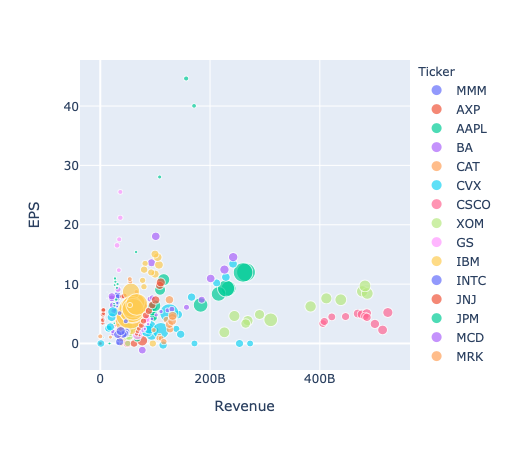

In [126]:
px.scatter(
    df_bubble_plot,
    x="Revenue",
    y="EPS",
    size="Market Cap",
    color="Ticker"
)

## Amrita looks at Column Correlations:

## Marshall creates Interactive Bubble Plot:

## David identifies limitations of data for plotting and filtering options: